In [28]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [18]:
labels = pd.read_csv('Data-PR-As2/Genes/labels.csv')
labels = labels.drop(labels='Unnamed: 0', axis=1)

In [16]:
data = pd.read_csv('Data-PR-As2/Genes/data.csv')
data = data.drop(labels='Unnamed: 0', axis=1)
data_norm = preprocessing.normalize(data)

In [23]:
kmeans = KMeans(n_clusters = 5, random_state = 2, n_init='auto')
kmeans.fit(data_norm)

KMeans(n_clusters=5, random_state=2)

In [24]:
score = silhouette_score(data_norm, kmeans.labels_, metric='euclidean')
score

0.2242819173071799

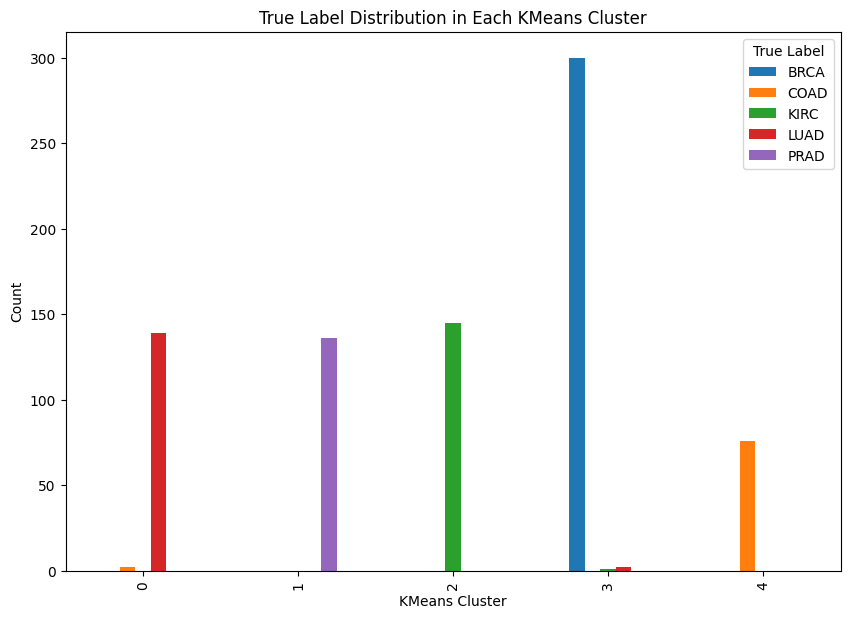

In [31]:
# Create a DataFrame for visualization
df = pd.DataFrame({'True Label': labels['Class'], 'Cluster': kmeans.labels_})

# Count how many of each true label are in each cluster
cluster_counts = df.groupby(['Cluster', 'True Label']).size().unstack(fill_value=0)

# Plot as grouped bar plot
cluster_counts.plot(kind='bar', stacked=False, figsize=(10, 7))
plt.title("True Label Distribution in Each KMeans Cluster")
plt.xlabel("KMeans Cluster")
plt.ylabel("Count")
plt.show()

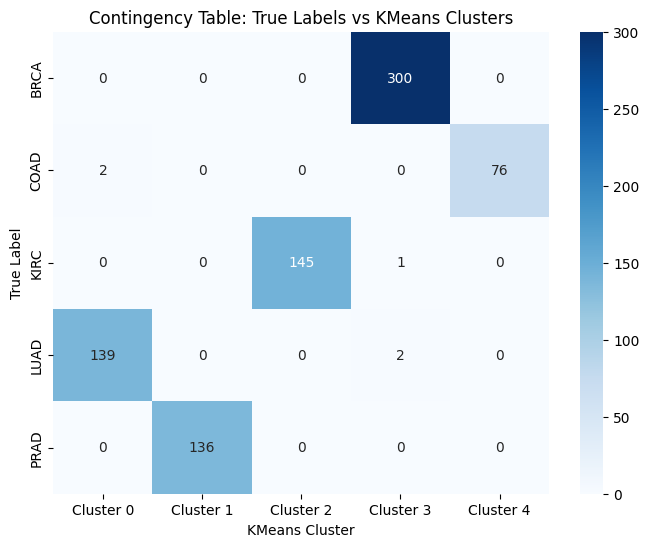

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Label encoding for true labels (strings to numbers)
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(labels['Class'])

# Create a contingency table (confusion matrix)
contingency_matrix = confusion_matrix(encoded_y, kmeans.labels_)

# Get the string names of the true labels and the cluster numbers
true_label_names = label_encoder.classes_
cluster_names = [f"Cluster {i}" for i in np.unique(kmeans.labels_)]

# Plotting the contingency matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=cluster_names, yticklabels=true_label_names)
plt.title("Contingency Table: True Labels vs KMeans Clusters")
plt.xlabel("KMeans Cluster")
plt.ylabel("True Label")
plt.show()